### Tutorial showing the application of the geospatial functions available in the module 'geospatialfunctions'.

This module is under construction, and gathers the most usefull geospatial analysis functions used so far. At the moment it encompasses:

1. plotpoints;
1. describeclusters;
3. plotboxplots;
4. plottimeseries.

Developed by: Thiago Victor Medeiros do Nascimento

In [2]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pymannkendall as mk
from plotly.offline import plot
import contextily as cx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import hydrobr
import datetime
import tqdm as tqdm
import warnings
warnings.simplefilter(action='ignore', category=Warning)

Here you can import the "geospatialfunctions" module, and check the functions inside:

In [3]:
import geospatialfunctions as gf
help(gf)

Help on module geospatialfunctions:

NAME
    geospatialfunctions - Created on Fri Feb 24 10:50:33 2023

DESCRIPTION
    @author: Thiago Nascimento
    Module with some usefull geospatial functions widely used for data-analysis.

FUNCTIONS
    describeclusters(dataset: pandas.core.frame.DataFrame, clusters: pandas.core.frame.DataFrame, statisticaldescriptor='mean', clustercolumnname='Cluster')
        Inputs
        ------------------
        
        dataset: dataframe[Index = Datetime; columns = [rain-gauges]]
        clusters: dataframe[Index = Code just as the columns of dataset; columns = clusters: 
        statisticaldescriptor: {"mean", "count", "std", "min", "25%", "50%", "75%", "max"}                    
        clustercolumn: Column cluster's name in the cluster dataframe.
            
        # It is essential that the columns of the dataframe dataset are the same as the index in the dataframe clusters. 
        
        Returns
        --------------------
        stationsd

Here you can load the monthly precipitation dataset:

In [4]:
monthdata = pd.read_csv("datasets/monthdata4.csv", index_col = [0])
monthdata.index = pd.to_datetime(monthdata.index)
monthdata

,00047002,00047003,00047004,00048006,00051002,00061000,00063000,00065001,00066000,00146005,...,08168000,08250002,08261000,08351002,08359000,08360000,08360002,08361000,08361001,08361004
dates,,,,,,,,,,,,,,,,,,,,,
1981-01-31,NaN,NaN,NaN,NaN,415.1,64.4,50.8,NaN,28.8,227.2,...,189.8,522.4,6.7,266.8,NaN,1.8,0.0,3.0,21.4,0.0
1981-02-28,NaN,NaN,NaN,NaN,236.1,151.2,200.2,NaN,106.8,238.6,...,217.3,625.8,58.1,575.8,NaN,NaN,11.6,24.6,21.4,NaN
1981-03-31,NaN,NaN,NaN,NaN,84.3,130.7,129.9,NaN,158.6,187.8,...,274.0,170.3,44.3,222.0,NaN,4.8,0.0,74.9,21.9,80.0
1981-04-30,NaN,NaN,NaN,NaN,158.7,274.1,389.2,NaN,123.9,151.0,...,228.6,390.3,302.9,343.8,NaN,286.0,231.8,84.7,298.9,438.0
1981-05-31,NaN,NaN,NaN,NaN,362.8,296.3,198.0,NaN,175.2,506.9,...,413.2,804.1,437.8,444.1,NaN,323.6,371.0,66.0,NaN,693.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,206.1,143.0,137.7,143.1,57.9,179.0,192.1,98.4,208.8,145.8,...,339.6,149.3,224.4,10.0,318.4,1709.6,320.4,323.0,299.7,295.0
2021-09-30,0.0,54.3,71.5,149.0,73.5,215.5,104.1,139.3,146.3,118.7,...,353.0,42.6,107.5,56.8,117.3,733.5,67.7,97.8,121.3,127.9
2021-10-31,22.5,2.3,19.3,39.2,32.8,473.8,129.3,237.2,274.5,107.5,...,154.6,178.8,148.8,163.7,71.3,191.8,67.4,201.1,180.9,182.3


Then you can download the stations information:

In [5]:
path =r'Datasets\stationsinfos.xlsx'
stationsinfos = pd.read_excel(path, usecols = [1,2,5,6,8,9], dtype={'Code': str}, index_col = 1)
stationsinfos

,Name,City,State,Latitude,Longitude
Code,,,,,
00047000,SALINÓPOLIS,SALINÓPOLIS,PARÁ,-0.6500,-47.5500
00047002,SALINÓPOLIS,SALINÓPOLIS,PARÁ,-0.6231,-47.3536
00047003,CURUÇA,CURUÇA,PARÁ,-0.7375,-47.8536
00047004,PRIMAVERA,PRIMAVERA,PARÁ,-0.9294,-47.0994
00047005,MARUDA,MARAPANIM,PARÁ,-0.6336,-47.6583
...,...,...,...,...,...
08461000,NOVA ESPERANÇA/MARCO BV-8,PACARAIMA,RORAIMA,4.4883,-61.1297
08464001,MISSÃO AUARIS - JUSANTE,BOA VISTA,RORAIMA,4.0031,-64.4431
08555060,WILLIAM KRAANPLEIN,SURINAME,SURINAME,5.8000,-55.1667


Here you clip just for the data from the used gauges:

In [6]:
stationsused = pd.DataFrame(index = monthdata.columns, data = stationsinfos )
stationsused

,Name,City,State,Latitude,Longitude
00047002,SALINÓPOLIS,SALINÓPOLIS,PARÁ,-0.6231,-47.3536
00047003,CURUÇA,CURUÇA,PARÁ,-0.7375,-47.8536
00047004,PRIMAVERA,PRIMAVERA,PARÁ,-0.9294,-47.0994
00048006,VIGIA,VIGIA,PARÁ,-0.8681,-48.1103
00051002,NAVIO,MAZAGÃO,AMAPÁ,-0.3992,-51.4203
...,...,...,...,...,...
08360000,MALOCA DO CONTÃO,PACARAIMA,RORAIMA,4.1667,-60.5289
08360002,FAZENDA PASSARÃO,BOA VISTA,RORAIMA,3.2078,-60.5711
08361000,FAZENDA SÃO JOÃO,AMAJARI,RORAIMA,3.6608,-61.3839
08361001,BOQUEIRÃO,ALTO ALEGRE,RORAIMA,3.2906,-61.2881


#### Functions' usage:

1. gf.plotpoints:

This function is used for generating a quick map plot with the desired points and a background map in background.

For this function it is important that your dataframe has as index the unique codes assigned for each point, and that in the columns you will have at least one called "Latitude" and another "Longitude" in EPSG: 4326.

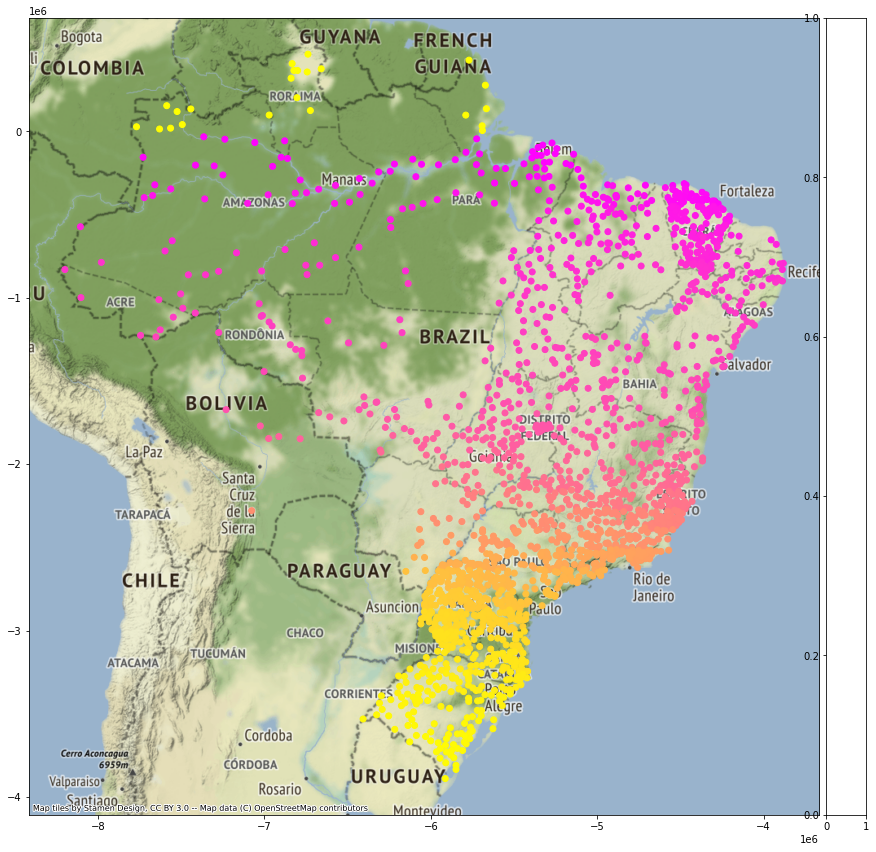

In [7]:
gf.plotpoints(plotsome = stationsused, showcodes = False, figsizeproj = (15, 30))

2. gf.describeclusters:

This function is useful for the quick computation of the main statistical descriptors, such as: min, max, median and percentils of an initial time-series per cluster. 
For example, one may have a initial time-series of several rain-gauge considering monthly precipitation data and information about potential clusters (or regions):


a. Firstly this function compute the maximum, minimum, average or other descriptor for each rain-gauge;

b. Secondly the statistical descriptors of this descriptor are computed per cluster (region). 

In [8]:
stationsdescriptor, clustersdescribe = gf.describeclusters(dataset = monthdata, clusters =  stationsused, 
                     statisticaldescriptor = "max", clustercolumnname = "State")

In [9]:
stationsdescriptor

,Cluster,max
00047002,PARÁ,1375.3
00047003,PARÁ,2327.2
00047004,PARÁ,885.0
00048006,PARÁ,757.8
00051002,AMAPÁ,512.2
...,...,...
08360000,RORAIMA,1709.6
08360002,RORAIMA,619.3
08361000,RORAIMA,620.0
08361001,RORAIMA,674.0


In [10]:
clustersdescribe

,mean,min,P25,P50,P75,P90,P95,P99,max,Q1+1.5IQR
Cluster,,,,,,,,,,
ACRE,540.833333,506.8,509.725,513.30,577.550,601.35,602.725,603.8250,604.1,611.4625
ALAGOAS,429.537500,250.8,340.500,414.20,537.025,584.05,591.225,596.9650,598.4,635.2875
AMAPÁ,847.571429,512.2,577.350,745.10,925.850,1295.80,1482.550,1631.9500,1669.3,1100.1000
AMAZONAS,709.505455,480.8,597.950,686.80,781.600,899.80,973.760,1173.0540,1262.1,873.4250
BAHIA,598.093750,340.6,488.400,566.70,678.725,789.45,844.100,987.4750,1633.0,773.8875
BOLÍVIA,502.833333,373.6,389.150,447.80,550.325,681.65,737.675,782.4950,793.7,630.9125
CEARÁ,563.907927,347.7,490.275,539.50,605.125,733.07,787.230,918.2850,976.0,662.5500
DISTRITO FEDERAL,595.194118,439.8,526.000,565.20,635.600,714.02,806.420,964.2440,1003.7,690.4000
ESPÍRITO SANTO,640.101351,440.0,543.375,630.20,712.075,788.34,844.920,917.9910,942.3,796.4250


3. gf.plotboxplots:

This function is useful for the plot of several boxplots from a big time-series. 

In this example this function is used in a dataframe of 1898 rain gauges being each labeled with an unique index (Code) and categorized per Clusters (Federation States in this case). 
Moreover, the dataframe has a column of a statistical descriptor (in this case the maximum precipitation) which will be used for the boxplots.

Therefore, the boxplots will be plot per Cluster. 

Here, the dataplot used is the dataframe result from the previous function "gf.describeclusters" called: "stationsdescriptor".

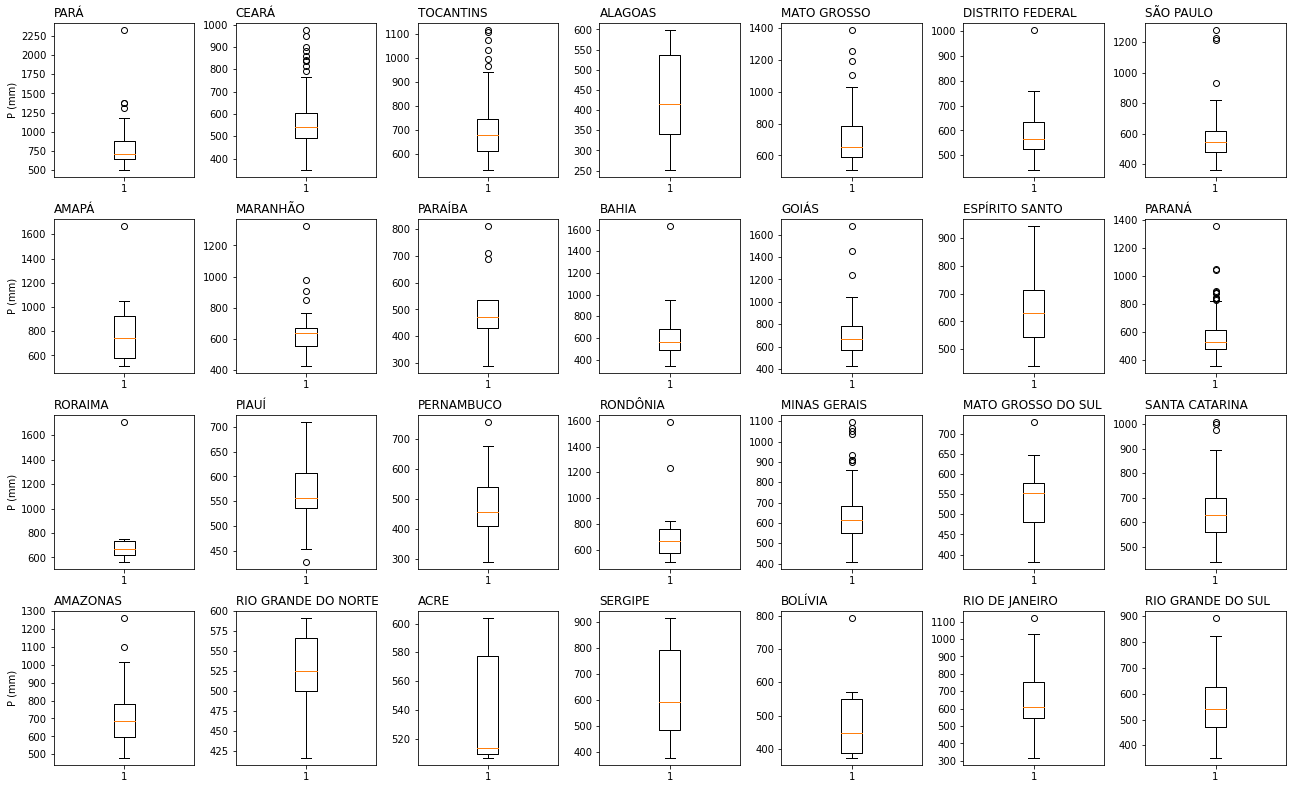

In [11]:
gf.plotboxplots(numr = 4, numc = 7, datatoplot = stationsdescriptor, setylim = False, 
                 ymin = 0, ymax = 1, figsizeproj = (18, 11), ylabelplot = "P (mm)")

4. gf.plottimeseries:

This function is used for generating a quickly several subplots of different time series in a single plot:

Our time-series example ("monthdata") has 1898 precipitation series, which is not practical for ploting in a single plot, therefore we can first select a small clip of this original dataset for ploting.

Here, we can compute the onthly average precipitation per cluster (State) and plot those time-series in a single plot with 28 subplots:

In [14]:
Clusters = stationsused["State"].unique()
Clusters

array(['PARÁ', 'AMAPÁ', 'RORAIMA', 'AMAZONAS', 'CEARÁ', 'MARANHÃO',
       'PIAUÍ', 'RIO GRANDE DO NORTE', 'TOCANTINS', 'PARAÍBA',
       'PERNAMBUCO', 'ACRE', 'ALAGOAS', 'BAHIA', 'RONDÔNIA', 'SERGIPE',
       'MATO GROSSO', 'GOIÁS', 'MINAS GERAIS', 'BOLÍVIA',
       'DISTRITO FEDERAL', 'ESPÍRITO SANTO', 'MATO GROSSO DO SUL',
       'RIO DE JANEIRO', 'SÃO PAULO', 'PARANÁ', 'SANTA CATARINA',
       'RIO GRANDE DO SUL'], dtype=object)

In [28]:
monthdataclusters = pd.DataFrame(index = monthdata.index, columns = Clusters)
for cluster in Clusters:
    monthdataclusters.loc[:, cluster] = monthdata.loc[:, stationsused[stationsused["State"] == cluster].index].mean(axis = 1)

For a better plot, we can resample our data to a annual basis:

<AxesSubplot:xlabel='dates'>

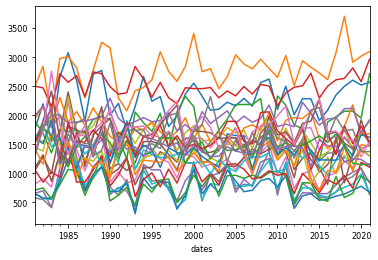

In [34]:
annualdataclusters = monthdataclusters.resample('Y').agg(lambda x: np.nan if np.isnan(x).any() else np.sum(x))
annualdataclusters.plot(legend= False)

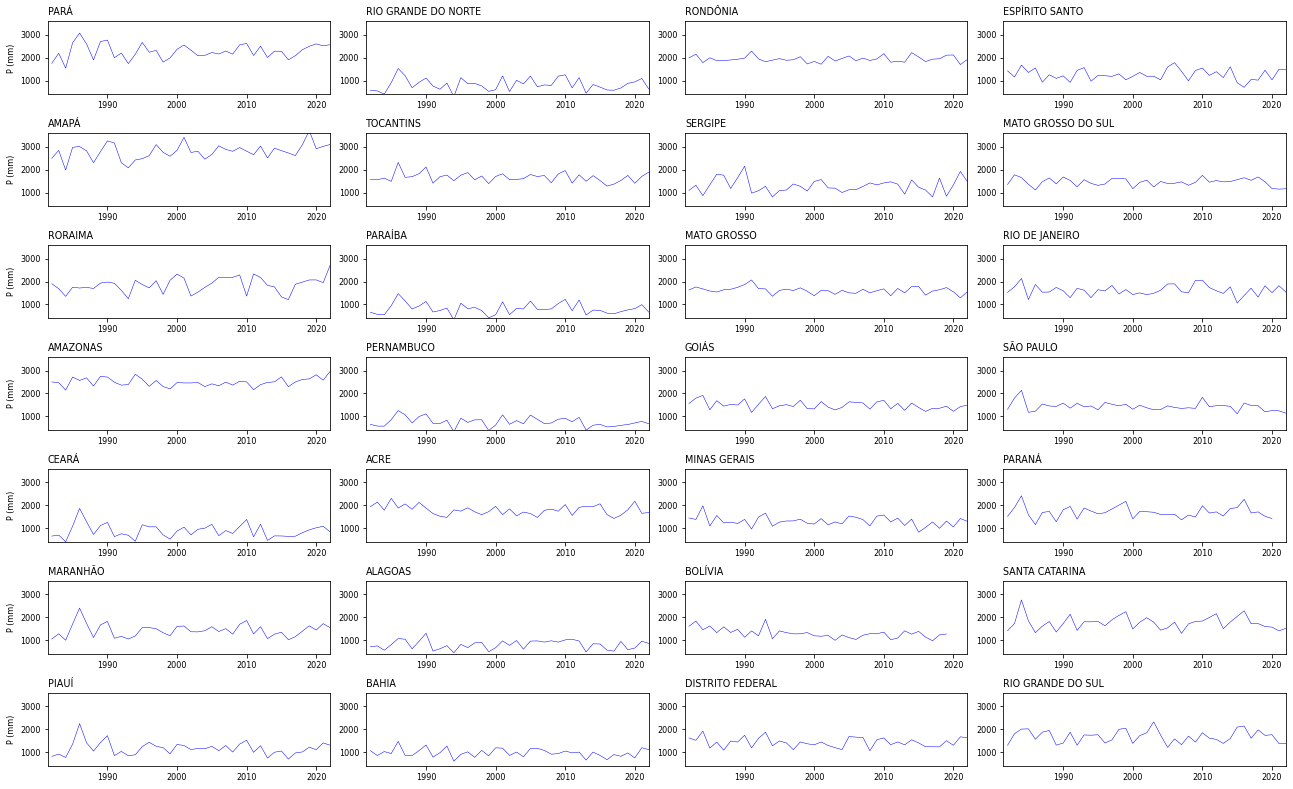

In [36]:
gf.plottimeseries(numr = 7, numc = 4, datatoplot = annualdataclusters, 
                  setylim = True, ymin = 400, ymax = 3600, figsizeproj = (18, 11),
                  colorgraph = "blue", linewidthproj = 0.5, linestyleproj = "-",  
                  ylabelplot = "P (mm)", datestart = datetime.date(1981, 6, 1), 
                  dateend = datetime.date(2021, 12, 31), 
                  setnumberofintervals = True, numberintervals = 10)